<a href="https://colab.research.google.com/github/Dakshak-Data/Machine_learning/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression Line: Y = 8.40X + 3.20
MAE       = 0.4800000000000001
MSE       = 0.31999999999999945
RMSE      = 0.5656854249492376
R²        = 0.997737556561086
Adjusted R² = 0.9969834087481146
MAPE      = 2.330088346059311 %
Predicted expenditure in 6th month: 53.6


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


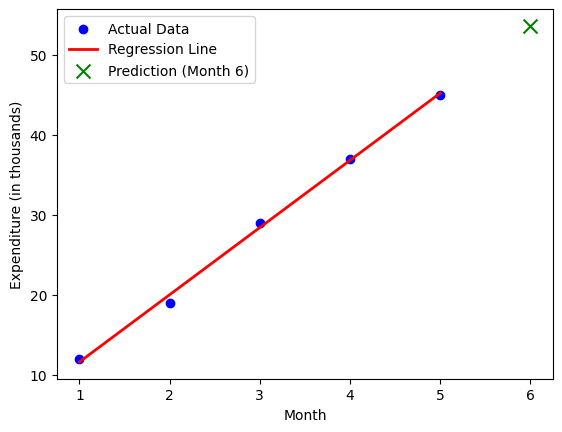

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# -----------------------------
# 1) Define the data in code
# -----------------------------
data = {
    "Month": [1, 2, 3, 4, 5],
    "Expenditure": [12, 19, 29, 37, 45]
}
df = pd.DataFrame(data)

X = df[["Month"]]   # predictor (2D array for sklearn)
y = df["Expenditure"]

# -----------------------------
# 2) Train regression model
# -----------------------------
model = LinearRegression()
model.fit(X, y)

# Model parameters
slope = model.coef_[0]
intercept = model.intercept_
print(f"Regression Line: Y = {slope:.2f}X + {intercept:.2f}")

# -----------------------------
# 3) Predictions & Metrics
# -----------------------------
y_pred = model.predict(X)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

n = len(y)
p = X.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

print("MAE       =", mae)
print("MSE       =", mse)
print("RMSE      =", rmse)
print("R²        =", r2)
print("Adjusted R² =", adj_r2)
print("MAPE      =", mape, "%")

# -----------------------------
# 4) Forecast for 6th month
# -----------------------------
y6 = model.predict([[6]])
print("Predicted expenditure in 6th month:", y6[0])

# -----------------------------
# 5) Visualization
# -----------------------------
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred, color="red", linewidth=2, label="Regression Line")
plt.scatter([6], y6, color="green", marker="x", s=100, label="Prediction (Month 6)")
plt.xlabel("Month")
plt.ylabel("Expenditure (in thousands)")
plt.legend()
plt.show()